<a href="https://colab.research.google.com/github/nerobite/neural_networks/blob/main/%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

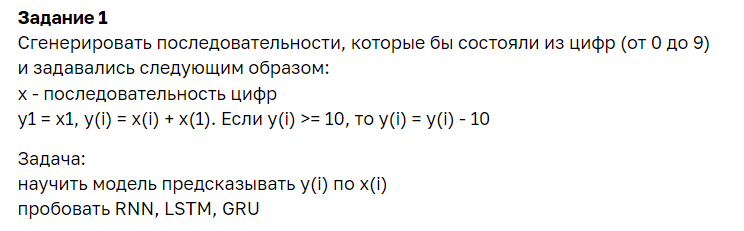

In [16]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn.utils.rnn as rnn_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tqdm.notebook as tqdm
import pandas as pd
import numpy as np
import re
import time
import time

In [57]:
def numeric_sequence(number, length):
    data_x = []
    data_y = []
    for _ in range(number):
        x_date = []
        y_date = []
        for _ in range(length):
            x = random.randint(0, 9)
            x_date.append(x)
        y_date.append(x_date[0])
        for i in range(1, len(x_date)):
            if x_date[i] + x_date[0] >= 10:
                y = x_date[i] + x_date[0] - 10
            else:
                y = x_date[i] + x_date[0]
            y_date.append(y)
        data_x.append(x_date)
        data_y.append(y_date)
    return data_x, data_y

In [58]:
x, y = numeric_sequence(3, 3)
print(x, y)

[[1, 8, 0], [5, 5, 5], [6, 4, 4]] [[1, 9, 1], [5, 0, 0], [6, 0, 0]]


In [124]:
data_25 = numeric_sequence(1000, 25)
data_75 = numeric_sequence(1000, 75)
data_125 = numeric_sequence(1000, 125)

In [110]:
# Преобразование данных в numpy массивы
x_data = np.array(data_25[0]).reshape(-1, 1)
y_data = np.array(data_25[1]).reshape(-1, 1)

In [111]:
x_data

array([[4],
       [2],
       [3],
       ...,
       [2],
       [0],
       [8]])

In [112]:
# Масштабирование данных
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_data = scaler_x.fit_transform(x_data)
y_data = scaler_y.fit_transform(y_data)

In [113]:
x_data

array([[0.44444444],
       [0.22222222],
       [0.33333333],
       ...,
       [0.22222222],
       [0.        ],
       [0.88888889]])

In [114]:
# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [115]:
# Преобразование данных в тензоры
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [116]:
# Создание DataLoader для обучения и тестирования
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [20]:
# Определение модели
class RNNModel(nn.Module):
    def __init__(self, model_type='RNN'):
        super(RNNModel, self).__init__()
        if model_type == 'RNN':
            self.rnn = nn.RNN(input_size=1, hidden_size=8, batch_first=True)
        elif model_type == 'LSTM':
            self.rnn = nn.LSTM(input_size=1, hidden_size=8, batch_first=True)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(input_size=1, hidden_size=8, batch_first=True)
        self.fc = nn.Linear(8, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [18]:
# Обучение и оценка модели
def train_and_evaluate(model, train_loader, test_loader, num_epochs=10):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        for x_batch, y_batch in train_loader:
            x_batch = x_batch.unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            total_loss = 0
            for x_batch, y_batch in test_loader:
                x_batch = x_batch.unsqueeze(1)
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch)
                total_loss += loss.item()
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(test_loader):.4f}, Time: {elapsed_time:.2f}s')

In [19]:
# Выбор типа модели
model_type_RNN = 'RNN'
model_type_LSTM = 'LSTM'
model_type_GRU = 'GRU'
model_rrn = RNNModel(model_type_RNN)
model_lstm = RNNModel(model_type_LSTM)
model_gru = RNNModel(model_type_GRU)

In [120]:
train_and_evaluate(model_rrn, train_loader, test_loader)

Epoch [1/10], Loss: 0.1025, Time: 3.33s
Epoch [2/10], Loss: 0.1026, Time: 3.22s
Epoch [3/10], Loss: 0.1028, Time: 2.90s
Epoch [4/10], Loss: 0.1032, Time: 2.93s
Epoch [5/10], Loss: 0.1025, Time: 3.15s
Epoch [6/10], Loss: 0.1026, Time: 3.42s
Epoch [7/10], Loss: 0.1026, Time: 2.90s
Epoch [8/10], Loss: 0.1032, Time: 2.91s
Epoch [9/10], Loss: 0.1037, Time: 2.95s
Epoch [10/10], Loss: 0.1027, Time: 3.62s


In [121]:
train_and_evaluate(model_lstm, train_loader, test_loader)

Epoch [1/10], Loss: 0.1027, Time: 4.03s
Epoch [2/10], Loss: 0.1027, Time: 5.84s
Epoch [3/10], Loss: 0.1033, Time: 4.62s
Epoch [4/10], Loss: 0.1029, Time: 4.09s
Epoch [5/10], Loss: 0.1026, Time: 4.84s
Epoch [6/10], Loss: 0.1026, Time: 3.91s
Epoch [7/10], Loss: 0.1026, Time: 3.92s
Epoch [8/10], Loss: 0.1026, Time: 4.75s
Epoch [9/10], Loss: 0.1029, Time: 4.02s
Epoch [10/10], Loss: 0.1025, Time: 3.94s


In [123]:
train_and_evaluate(model_gru, train_loader, test_loader)

Epoch [1/10], Loss: 0.1026, Time: 3.58s
Epoch [2/10], Loss: 0.1032, Time: 4.31s
Epoch [3/10], Loss: 0.1025, Time: 3.74s
Epoch [4/10], Loss: 0.1029, Time: 3.55s
Epoch [5/10], Loss: 0.1028, Time: 4.22s
Epoch [6/10], Loss: 0.1031, Time: 5.03s
Epoch [7/10], Loss: 0.1025, Time: 3.55s
Epoch [8/10], Loss: 0.1026, Time: 3.53s
Epoch [9/10], Loss: 0.1025, Time: 4.97s
Epoch [10/10], Loss: 0.1025, Time: 3.52s


In [125]:
# Проведем эксперемент для длинны последовательности = 75
# Преобразование данных в numpy массивы
x_data = np.array(data_75[0]).reshape(-1, 1)
y_data = np.array(data_75[1]).reshape(-1, 1)

# Масштабирование данных
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_data = scaler_x.fit_transform(x_data)
y_data = scaler_y.fit_transform(y_data)

# Масштабирование данных
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_data = scaler_x.fit_transform(x_data)
y_data = scaler_y.fit_transform(y_data)

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Преобразование данных в тензоры
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Создание DataLoader для обучения и тестирования
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [126]:
train_and_evaluate(model_rrn, train_loader, test_loader)

Epoch [1/10], Loss: 0.1016, Time: 9.45s
Epoch [2/10], Loss: 0.1021, Time: 10.11s
Epoch [3/10], Loss: 0.1017, Time: 10.15s
Epoch [4/10], Loss: 0.1017, Time: 11.58s
Epoch [5/10], Loss: 0.1024, Time: 9.21s
Epoch [6/10], Loss: 0.1017, Time: 10.72s
Epoch [7/10], Loss: 0.1016, Time: 9.80s
Epoch [8/10], Loss: 0.1018, Time: 10.66s
Epoch [9/10], Loss: 0.1017, Time: 8.90s
Epoch [10/10], Loss: 0.1018, Time: 9.10s


In [127]:
train_and_evaluate(model_lstm, train_loader, test_loader)

Epoch [1/10], Loss: 0.1016, Time: 12.70s
Epoch [2/10], Loss: 0.1020, Time: 12.71s
Epoch [3/10], Loss: 0.1017, Time: 12.71s
Epoch [4/10], Loss: 0.1019, Time: 12.91s
Epoch [5/10], Loss: 0.1017, Time: 12.53s
Epoch [6/10], Loss: 0.1017, Time: 12.64s
Epoch [7/10], Loss: 0.1017, Time: 13.15s
Epoch [8/10], Loss: 0.1022, Time: 12.60s
Epoch [9/10], Loss: 0.1016, Time: 13.02s
Epoch [10/10], Loss: 0.1016, Time: 12.60s


In [128]:
train_and_evaluate(model_gru, train_loader, test_loader)

Epoch [1/10], Loss: 0.1019, Time: 11.22s
Epoch [2/10], Loss: 0.1018, Time: 10.82s
Epoch [3/10], Loss: 0.1027, Time: 11.12s
Epoch [4/10], Loss: 0.1016, Time: 11.31s
Epoch [5/10], Loss: 0.1017, Time: 11.23s
Epoch [6/10], Loss: 0.1017, Time: 11.34s
Epoch [7/10], Loss: 0.1018, Time: 11.32s
Epoch [8/10], Loss: 0.1019, Time: 11.32s
Epoch [9/10], Loss: 0.1017, Time: 10.80s
Epoch [10/10], Loss: 0.1017, Time: 11.09s


In [130]:
# Проведем эксперемент для длинны последовательности = 125
# Преобразование данных в numpy массивы
x_data = np.array(data_125[0]).reshape(-1, 1)
y_data = np.array(data_125[1]).reshape(-1, 1)

# Масштабирование данных
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_data = scaler_x.fit_transform(x_data)
y_data = scaler_y.fit_transform(y_data)

# Масштабирование данных
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_data = scaler_x.fit_transform(x_data)
y_data = scaler_y.fit_transform(y_data)

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Преобразование данных в тензоры
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Создание DataLoader для обучения и тестирования
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [131]:
train_and_evaluate(model_rrn, train_loader, test_loader)

Epoch [1/10], Loss: 0.1011, Time: 16.96s
Epoch [2/10], Loss: 0.1013, Time: 15.67s
Epoch [3/10], Loss: 0.1011, Time: 15.23s
Epoch [4/10], Loss: 0.1013, Time: 15.24s
Epoch [5/10], Loss: 0.1010, Time: 15.19s
Epoch [6/10], Loss: 0.1011, Time: 15.32s
Epoch [7/10], Loss: 0.1014, Time: 15.99s
Epoch [8/10], Loss: 0.1010, Time: 15.39s
Epoch [9/10], Loss: 0.1011, Time: 15.14s
Epoch [10/10], Loss: 0.1011, Time: 15.27s


In [132]:
train_and_evaluate(model_lstm, train_loader, test_loader)

Epoch [1/10], Loss: 0.1011, Time: 21.60s
Epoch [2/10], Loss: 0.1024, Time: 20.78s
Epoch [3/10], Loss: 0.1011, Time: 21.67s
Epoch [4/10], Loss: 0.1011, Time: 21.84s
Epoch [5/10], Loss: 0.1011, Time: 20.82s
Epoch [6/10], Loss: 0.1011, Time: 21.68s
Epoch [7/10], Loss: 0.1013, Time: 21.11s
Epoch [8/10], Loss: 0.1011, Time: 21.61s
Epoch [9/10], Loss: 0.1011, Time: 21.84s
Epoch [10/10], Loss: 0.1015, Time: 20.64s


In [133]:
train_and_evaluate(model_gru, train_loader, test_loader)

Epoch [1/10], Loss: 0.1012, Time: 19.42s
Epoch [2/10], Loss: 0.1011, Time: 18.49s
Epoch [3/10], Loss: 0.1011, Time: 18.92s
Epoch [4/10], Loss: 0.1010, Time: 18.91s
Epoch [5/10], Loss: 0.1012, Time: 18.58s
Epoch [6/10], Loss: 0.1011, Time: 19.42s
Epoch [7/10], Loss: 0.1011, Time: 18.51s
Epoch [8/10], Loss: 0.1011, Time: 19.43s
Epoch [9/10], Loss: 0.1010, Time: 18.52s
Epoch [10/10], Loss: 0.1010, Time: 18.59s


In [ ]:
#Пытался специально ухуджить модель, т.к. лосс после первой же эпохи уходил в 0.0000, качество моделей примерно одинаково и не зависит от длинны последовательности,
# задача для всех трех моделей оказалась довольно простой, длинна последовательности разве что повлияла на время выполнения расчетов, где RNN показал наилучший вариант.

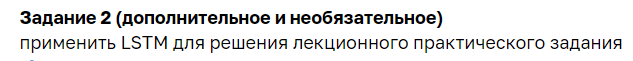

In [1]:
!wget https://s3.amazonaws.com/text-datasets/nietzsche.txt

--2024-07-11 07:53:14--  https://s3.amazonaws.com/text-datasets/nietzsche.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.24.78, 52.217.123.8, 52.217.73.70, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.24.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 600901 (587K) [text/plain]
Saving to: ‘nietzsche.txt’

nietzsche.txt       100%[===================>] 586.82K  1.34MB/s    in 0.4s    

2024-07-11 07:53:15 (1.34 MB/s) - ‘nietzsche.txt’ saved [600901/600901]



In [4]:
with open('nietzsche.txt', encoding='utf-8') as f:
    text = f.read().lower()
print('length:', len(text))
text = re.sub('[^a-z ]', ' ', text)
text = re.sub('\s+', ' ', text)

length: 600893


In [5]:
INDEX_TO_CHAR = sorted(list(set(text)))
CHAR_TO_INDEX = {c: i for i, c in enumerate(INDEX_TO_CHAR)}

In [6]:
MAX_LEN = 40
STEP = 3
SENTENCES = []
NEXT_CHARS = []
for i in range(0, len(text) - MAX_LEN, STEP):
    SENTENCES.append(text[i: i + MAX_LEN])
    NEXT_CHARS.append(text[i + MAX_LEN])
print('Num sents:', len(SENTENCES))

Num sents: 193075


In [7]:
print('Vectorization...')
X = torch.zeros((len(SENTENCES), MAX_LEN), dtype=int)
Y = torch.zeros((len(SENTENCES)), dtype=int)
for i, sentence in enumerate(SENTENCES):
    for t, char in enumerate(sentence):
        X[i, t] = CHAR_TO_INDEX[char]
    Y[i] = CHAR_TO_INDEX[NEXT_CHARS[i]]

Vectorization...


In [8]:
BATCH_SIZE=512
dataset = torch.utils.data.TensorDataset(X, Y)
data = torch.utils.data.DataLoader(dataset, BATCH_SIZE, shuffle=True)

In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self, rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes):
        super().__init__()

        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(dictionary_size, embedding_size)
        self.hidden = rnnClass(embedding_size, num_hiddens, batch_first=True)
        self.output = nn.Linear(num_hiddens, num_classes)

    def forward(self, X):
        out = self.embedding(X)
        _, state = self.hidden(out)
        if isinstance(state, tuple):
            state = state[0]
        predictions = self.output(state[-1])
        return predictions

In [28]:
dictionary_size = len(CHAR_TO_INDEX)
embedding_size = 64
num_hiddens = 128
num_classes = dictionary_size
model = NeuralNetwork(nn.LSTM, dictionary_size, embedding_size, num_hiddens, num_classes).cuda()

In [23]:
model = model.cuda()

In [29]:
def sample(preds):
    softmaxed = torch.softmax(preds, 0)
    probas = torch.distributions.multinomial.Multinomial(1, softmaxed).sample()
    return probas.argmax()

def generate_text():
    start_index = random.randint(0, len(text) - MAX_LEN - 1)

    generated = ''
    sentence = text[start_index: start_index + MAX_LEN]
    generated += sentence

    for i in range(MAX_LEN):
        x_pred = torch.zeros((1, MAX_LEN), dtype=int)
        for t, char in enumerate(generated[-MAX_LEN:]):
            x_pred[0, t] = CHAR_TO_INDEX[char]

        preds = model(x_pred.cuda())[0].cpu()
        next_char = INDEX_TO_CHAR[sample(preds)]
        generated = generated + next_char

    print(generated[:MAX_LEN] + '|' + generated[MAX_LEN:])

In [30]:
generate_text()

autonomous manly conquering and imperiou|oejxbzkpmdgcgqcyqabnbctcrjduioxfsdxioshi


In [31]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [32]:
for ep in range(100):
    start = time.time()
    train_loss = 0.0
    train_passed = 0

    model.train()
    for X_b, y_b in tqdm.tqdm(data):
        X_b, y_b = X_b.cuda(), y_b.cuda()
        optimizer.zero_grad()
        answers = model(X_b)
        y_b = y_b.view(-1)
        loss = criterion(answers, y_b)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        train_passed += 1

    print("Epoch {}. Time: {:.3f}, Train loss: {:.3f}".format(ep, time.time() - start, train_loss / train_passed))
    model.eval()
    generate_text()

  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 0. Time: 4.279, Train loss: 2.163
ve which he himself has developed he the|rse a a so pelaan ad his the oliy as tha


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 1. Time: 3.912, Train loss: 1.772
or his goodness patience and spiritualit|y of the de nobrough usemint to igour th


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 2. Time: 3.582, Train loss: 1.635
innate partiality for seeing the cause o|ther of the toul mudeeven happuct laniti


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 3. Time: 3.462, Train loss: 1.549
es nor become as a whole a victim to any| long equally anow he of ownis in chyman


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 4. Time: 4.153, Train loss: 1.489
t he has been familiar with and at home |soum one but fan most nery they conlieve


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 5. Time: 3.618, Train loss: 1.444
tary consciousness of being a superior b|y it he way socitaticn which alwho the s


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 6. Time: 3.914, Train loss: 1.407
helet calls it not without a shudder but| the recule only to trued the were teypo


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 7. Time: 4.054, Train loss: 1.378
ds the heated folly of the emotions whic|h deeven and inconcitial truthful what b


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 8. Time: 3.796, Train loss: 1.354
em or elevate and inspire them they will| painsoled view as the enviert of mustro


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 9. Time: 3.598, Train loss: 1.333
he philosopher with the caesarian traine|d things becussion as his matters incoun


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 10. Time: 3.643, Train loss: 1.315
may say that woman would not have the ge|neral of grability piture cliver that s 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 11. Time: 4.126, Train loss: 1.298
for the elegant the amorous the tripping| as the stir its it a great to the oljes


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 12. Time: 3.646, Train loss: 1.283
p the nervous system through various inn|ient of treelencing as this lained from 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 13. Time: 3.637, Train loss: 1.270
attention to the more select cases and i|nstrup and most personal does who compes


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 14. Time: 4.049, Train loss: 1.258
hat feeling of freedom from personal res|ult and most dispriness in parte of the 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 15. Time: 3.631, Train loss: 1.246
lso attempts at the reconciliation of th|e demoritions of off its afficted s whic


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 16. Time: 3.515, Train loss: 1.235
 with a waggish suspicion that it is not| aims the wowlly sufferentous natioluse 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 17. Time: 4.107, Train loss: 1.227
f men is important to somebody apart fro|m the repudiarity of the actual secret n


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 18. Time: 3.803, Train loss: 1.218
 this task itself demands something else| ol nayment of a belief in returd to sum


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 19. Time: 3.578, Train loss: 1.209
errifying than other peoples are to them| is all the ideas the temptaring mentioc


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 20. Time: 3.930, Train loss: 1.201
so much respect by men as at present thi|nk when an act that coursel has thereby 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 21. Time: 4.053, Train loss: 1.193
artly by an alteration of our judgment r|election will de which phand faluenicate


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 22. Time: 3.556, Train loss: 1.186
ifficult to pry with foregrounds and bac|kbly because the univeragent at all toor


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 23. Time: 3.706, Train loss: 1.178
s in himself the powerful one him also w|e regard that a sympto and day is always


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 24. Time: 4.262, Train loss: 1.172
be necessary it would not consider itsel|f and that childizes and forther toward 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 25. Time: 3.675, Train loss: 1.166
nificance of words the people on their p|arspectating to comes that the human jug


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 26. Time: 3.597, Train loss: 1.158
 servants of their people or instruments| of purpose of the psycholosophyracity w


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 27. Time: 4.254, Train loss: 1.152
s for the sake of whom one blesses and h|is devally slepities preyers he cause an


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 28. Time: 3.702, Train loss: 1.146
among the indians as among the greeks pe|rhaps he head a fear from him for sounds


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 29. Time: 3.544, Train loss: 1.141
ey become like the will o the wisps arou|ns undown perhaps been persons as howeve


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 30. Time: 4.125, Train loss: 1.137
easure left to classical antiquity when |in every fore clivated for example that 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 31. Time: 3.844, Train loss: 1.130
ow my realm what realm hath wider bounda|n even brighterness and in one was utili


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 32. Time: 3.712, Train loss: 1.125
s depression indeed is due apparently to| height the existence of which a gost s 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 33. Time: 3.673, Train loss: 1.120
ence and to pascal like sacrifizia dell |without if the goven overs belief and st


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 34. Time: 4.054, Train loss: 1.115
book where formerly she kept herself in |order to dangerous teet for them tere th


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 35. Time: 3.568, Train loss: 1.111
with regard to philosophical metaphysics| a philosophers nory excessations which 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 36. Time: 3.726, Train loss: 1.106
sult of defective thinking whatever atti|ness of present to learn to thus resuste


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 37. Time: 4.244, Train loss: 1.102
good faith in a cause it is inhuman to b|e a point of a greatest it is no matter 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 38. Time: 3.701, Train loss: 1.097
 the problem of the value of truth prese|rvation a spiritude and taste of conscie


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 39. Time: 3.556, Train loss: 1.092
on the whole woman has hitherto been mos|t himself and therefore and preservacian


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 40. Time: 4.199, Train loss: 1.088
ee to refresh me to refresh me oh thou p|olence of the superiors of the instinct 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 41. Time: 3.549, Train loss: 1.083
the lower quarters of the town that as m|ore countel you obracied and psychologic


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 42. Time: 3.739, Train loss: 1.079
 in our nature when kant says the intell|ectual very hence fastic instimbination 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 43. Time: 4.093, Train loss: 1.075
xtends we shield ourselves from pain if |its suffering for instance to immediatel


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 44. Time: 3.827, Train loss: 1.071
n believe that the nature man knows can |stond of instiminated against becultary 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 45. Time: 3.731, Train loss: 1.067
wretched obstacles promising development| by the mind always gratitude as if one 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 46. Time: 3.769, Train loss: 1.062
m steeped in literature to their eyes an|d bet that such different like which is 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 47. Time: 4.142, Train loss: 1.059
advocatus dei avails himself of he who r|icher men who felt from it the feeling p


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 48. Time: 3.732, Train loss: 1.056
nsvaluation of all ancient values it was| a human raid of kindar which alte myste


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 49. Time: 3.600, Train loss: 1.052
over used words optimism and pessimism f|or motives that beingmer the way inhight


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 50. Time: 4.340, Train loss: 1.048
t results were attained with the basest |and as a veries almost cannot left my em


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 51. Time: 3.714, Train loss: 1.045
not yet adopted practices the custom is |something for a freet said he is difficu


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 52. Time: 3.574, Train loss: 1.042
 doings of conscious and willing beings |to the world will to progsingly esmire a


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 53. Time: 4.290, Train loss: 1.037
body to be unwilling to renounce or to s|timp of giones venitual as the vanity of


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 54. Time: 3.716, Train loss: 1.035
omy aspect like a cloud over charged wit|h more history what is not to the most l


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 55. Time: 3.717, Train loss: 1.031
to protect itself from contact with offi|nest is to philosophy kinds in zet finar


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 56. Time: 3.954, Train loss: 1.027
and so that we are comparatively calcula|tions of moral for him in philosophizin 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 57. Time: 3.882, Train loss: 1.024
erful antagonists of atheism are found i|n its ruless hophinable or a neighbod th


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 58. Time: 3.778, Train loss: 1.020
ical obscurantists of all nations to fin|d actions as for understand with other m


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 59. Time: 3.770, Train loss: 1.018
 namely richard wagner should bring his |dead in our brover and everyligh to hono


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 60. Time: 4.094, Train loss: 1.015
lf decides for himself and for others wh|at could laming us at enthile almost hea


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 61. Time: 3.753, Train loss: 1.011
re to be thus and so not to act thus and| also should be are we belongs to the mi


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 62. Time: 3.603, Train loss: 1.008
l indian greek and german philosophizing| is probability is not s a desire that i


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 63. Time: 4.324, Train loss: 1.006
r the intimidation of another creature i|ndeed that we are not in general but was


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 64. Time: 3.622, Train loss: 1.002
e sufferers courage to the oppressed and| equality that he word am i have revelly


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 65. Time: 3.784, Train loss: 1.000
ment which was really youthfulness notwi|thsts for the bradiaring disposition to 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 66. Time: 4.241, Train loss: 0.996
 one of the authorities in matters of sa|ys in german substinute and inspired hea


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 67. Time: 3.600, Train loss: 0.993
rs we venture the following exposition o|f goodness his transly of the strength i


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 68. Time: 3.688, Train loss: 0.990
h bacon represents an attack on the phil|osopher also to free wholly he radically


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 69. Time: 4.225, Train loss: 0.987
w the old stream of delight the most man|kind perhaps we perpected a sharpestly d


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 70. Time: 3.866, Train loss: 0.985
e sense for instance we enjoy homer once| decluarry as so much so called perhaps 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 71. Time: 3.580, Train loss: 0.984
upposing a statesman were to bring his p|alarjicon of conscience that different o


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 72. Time: 3.981, Train loss: 0.982
the german spirit and its critical and h|elpred it is nature of consciences and e


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 73. Time: 3.971, Train loss: 0.978
 not thrown away the inner world of exal|ted stand once free wore overcly the slo


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 74. Time: 3.774, Train loss: 0.976
th each other decay deterioration and th|e philax dawse minds in the besto secres


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 75. Time: 3.763, Train loss: 0.974
s whoever has seen deeply into the world| underforical and entortiness the most d


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 76. Time: 4.366, Train loss: 0.972
ught comes so easily to us now because w|ould sharte inspire a state but you too 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 77. Time: 3.752, Train loss: 0.968
e ascetic the ascetic makes out of virtu|e of you excrits enough which he has bee


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 78. Time: 3.601, Train loss: 0.965
se are involuntary whoever promises some| its madage electicitude and eyes for wh


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 79. Time: 4.312, Train loss: 0.964
goethe s verse speaks all greatest sages| as of a peptoos are man it is not obpar


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 80. Time: 3.640, Train loss: 0.962
acteristic of the moral faith in oneself| a bluddles on the eaght knowny thought 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 81. Time: 3.794, Train loss: 0.960
nting in particular all idea of natural |thought may abovien of rather to do are 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 82. Time: 4.319, Train loss: 0.956
hers of the future might rightly perhaps| even to fear and in the bonessit and id


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 83. Time: 3.828, Train loss: 0.957
son also makes his lot easier through th|e religious existing is neverthely destr


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 84. Time: 3.617, Train loss: 0.953
s from greed truth from error the metaph|ysical vostion and defense seem to pract


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 85. Time: 4.002, Train loss: 0.951
njust is essential all judgments of the |crismine the awarly conditionably good t


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 86. Time: 3.895, Train loss: 0.950
 an animal thus has he taken himself as |phenomena is even the sif cosmide this i


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 87. Time: 3.783, Train loss: 0.946
a decided disadvantage attending the ter|m of accides to power flight as this cas


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 88. Time: 3.813, Train loss: 0.945
ess of higher men this eternal too late |results that of a priots great character


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 89. Time: 4.267, Train loss: 0.944
ms every feeling every change a somethin|g that it is their heart but it is the d


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 90. Time: 3.648, Train loss: 0.942
 degree suitable to give rise to excepti|onal woman not a rook and whose spirit f


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 91. Time: 3.796, Train loss: 0.939
s which have hitherto operated upon mank|ind will be extrement a solitude writuhi


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 92. Time: 4.309, Train loss: 0.939
 philosophizing is so far a kind of atav|ism falsely reason that which strefeilt 


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 93. Time: 3.766, Train loss: 0.937
ake bad are just as little counter argum|ents at present the way those break ofte


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 94. Time: 3.638, Train loss: 0.934
banish the anti semitic bawlers out of t|he judgess and obedience not finally lie


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 95. Time: 4.422, Train loss: 0.933
d of an extravagant magnanimity after wh|ich in the most embery consciences shoul


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 96. Time: 3.791, Train loss: 0.930
atuesque coldness towards the heated fol|lisis itselens there tordistueness and g


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 97. Time: 3.668, Train loss: 0.930
cay deterioration and the loftiest desir|e we have altoow has in short and he bel


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 98. Time: 4.254, Train loss: 0.929
th his principles a man seeks either to |enthilg to nature become seems holy perp


  0%|          | 0/378 [00:00<?, ?it/s]

Epoch 99. Time: 3.744, Train loss: 0.928
cherous eyes as though the hand were not| at bott and expression or that it is on
